In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [10]:
def p_excited(t, Omega, delta, tau):
    Omega_gen = np.sqrt(Omega**2 + delta**2)
    offset = Omega ** 2 / Omega_gen ** 2 / 2
    return offset + (Omega ** 2 / Omega_gen ** 2 * np.sin(Omega_gen * t / 2) ** 2 - offset) * np.exp(-t / tau)

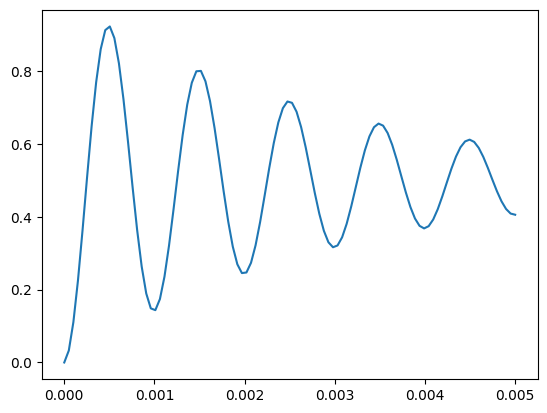

In [11]:
fig, ax = plt.subplots()
Omega = 1e3 * 2 * np.pi
ts = np.linspace(0, 5e-3, 100)
delta = 0e3
tau = 0.003
ax.plot(ts, p_excited(ts, Omega, delta, tau))
plt.show()

In [12]:
def uniform_inhomogenous_broadening(delta, span):
    return np.heaviside(span - delta, 0.5) * np.heaviside(delta + span, 0.5) / (2 * span)

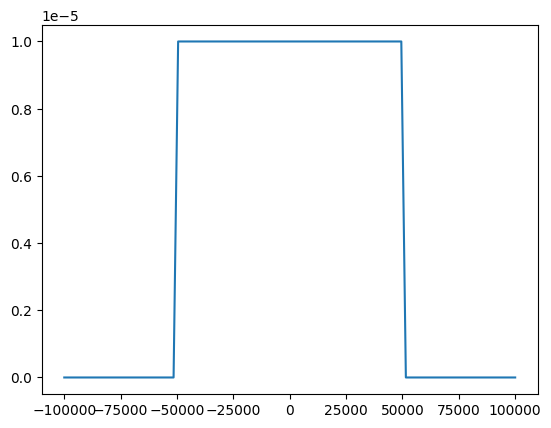

In [13]:
fig, ax = plt.subplots()
span = 50e3
fs = np.linspace(-100e3, 100e3, 100)
ax.plot(fs, uniform_inhomogenous_broadening(fs, span))
plt.show()

In [14]:
span = 30e3 * 2 * np.pi
def p_excited_with_inhomogenous(t, Omega, tau):
    def integrand(delta):
        return p_excited(t, Omega, delta, tau) * uniform_inhomogenous_broadening(delta, span)
    return quad(integrand, -span, span)

/tmp/ipykernel_77043/693268045.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, -span, span)
/tmp/ipykernel_77043/693268045.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, -span, span)


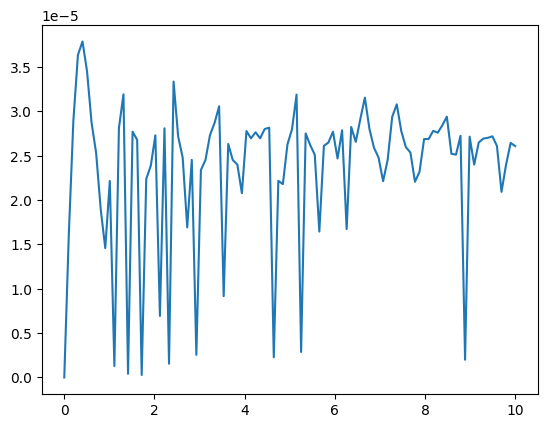

In [21]:
fig, ax = plt.subplots()
Omega = 1 * 2 * np.pi
ts = np.linspace(0, 10, 100)
tau = 10
ps = [p_excited_with_inhomogenous(t, Omega, tau)[0] for t in ts]
ax.plot(ts, ps)
plt.show()

/tmp/ipykernel_77043/1804434765.py:3: RuntimeWarning: invalid value encountered in scalar divide
  offset = Omega ** 2 / Omega_gen ** 2 / 2
/tmp/ipykernel_77043/1804434765.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return offset + (Omega ** 2 / Omega_gen ** 2 * np.sin(Omega_gen * t / 2) ** 2 - offset) * np.exp(-t / tau)
/tmp/ipykernel_77043/693268045.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, -span, span)


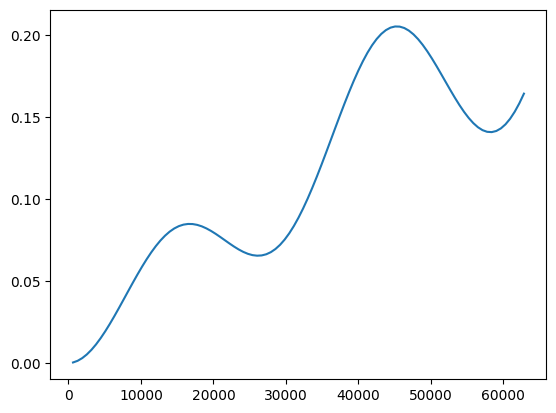

In [19]:
fig, ax = plt.subplots()
Omegas = np.linspace(0, 10 * 1e3, 100) * 2 * np.pi
t = 0.2e-3
tau = 0.01
ps = [p_excited_with_inhomogenous(t, Omega, tau)[0] for Omega in Omegas]
ax.plot(Omegas, ps)
plt.show()